In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
data = pd.read_csv("/home/vatsal/Downloads/household_power_consumption.txt",sep=';',parse_dates={'dt':['Date' , 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [84]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [85]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [87]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [88]:
data = data.fillna(data.mean(),axis=0)

In [89]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [90]:
data.isnull().values.any()

False

In [91]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [92]:
data.resample('A').mean()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-31,1.901148,0.131384,241.441016,8.029338,1.248613,2.214821,7.409385
2007-12-31,1.116818,0.117413,239.394782,4.763477,1.230895,1.635206,5.799521
2008-12-31,1.072102,0.117111,240.626484,4.551994,1.109850,1.256224,6.033809
2009-12-31,1.078743,0.131346,241.885747,4.555616,1.136718,1.137182,6.819745
2010-12-31,1.062136,0.129215,241.490451,4.483966,0.992509,1.109000,7.214870


In [70]:
#EDA

/home/vatsal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


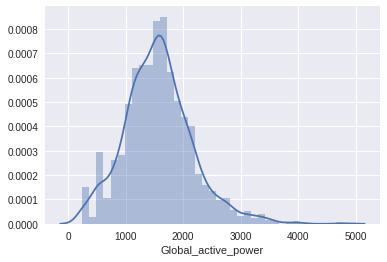

In [14]:
sns.distplot(data['Global_active_power'].resample('D').sum())

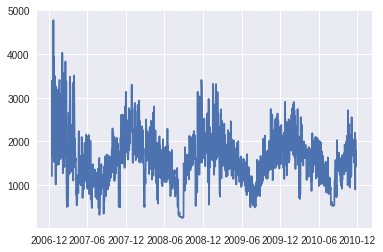

In [15]:
plt.plot(data['Global_active_power'].resample('D').sum())


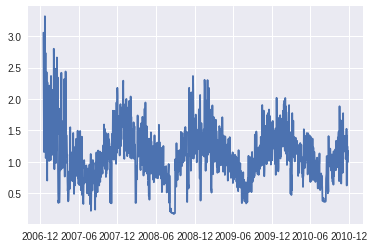

In [16]:
plt.plot(data['Global_active_power'].resample('D').mean())

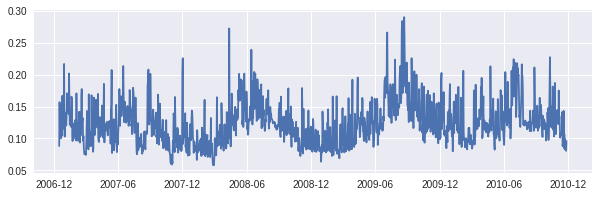

In [17]:
plt.figure(figsize=(10,3))
plt.plot(data['Global_reactive_power'].resample('D').mean())

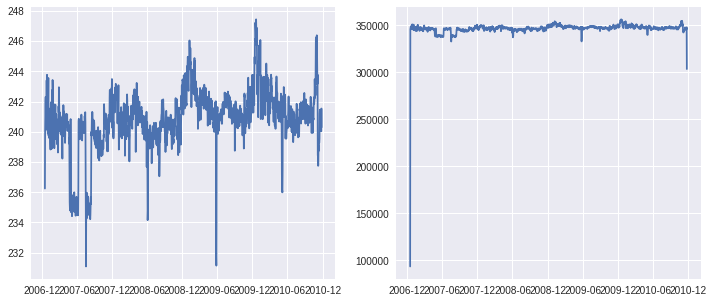

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(data['Voltage'].resample('D').mean())
plt.subplot(122)
plt.plot(data['Voltage'].resample('D').sum())

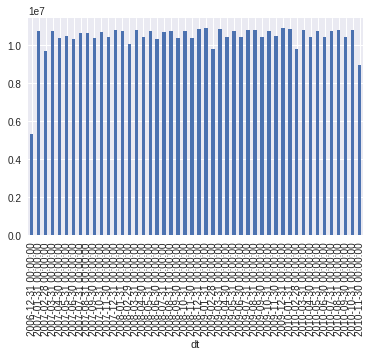

In [19]:
data['Voltage'].resample('M').sum().plot(kind='bar')

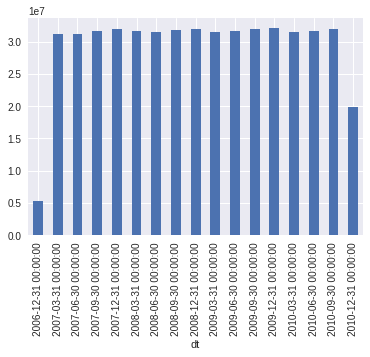

In [20]:
data['Voltage'].resample('Q').sum().plot(kind='bar')

In [21]:
# Voltage is seen constant around its values.. Important merthod for feature scaling

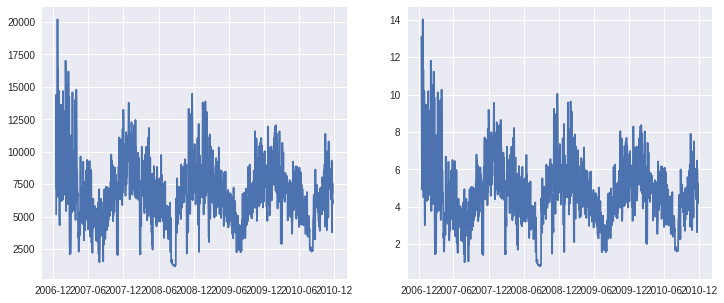

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(data['Global_intensity'].resample('D').sum())
plt.subplot(1,2,2)
plt.plot(data['Global_intensity'].resample('D').mean())

In [60]:
# Chances of correlation between Global intensity and Global active power

/home/vatsal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


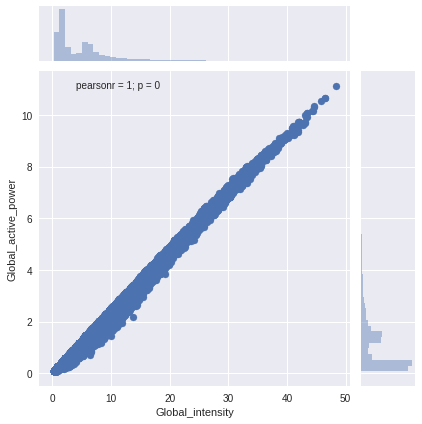

In [50]:
sns.jointplot(x='Global_intensity',y='Global_active_power',data=data)

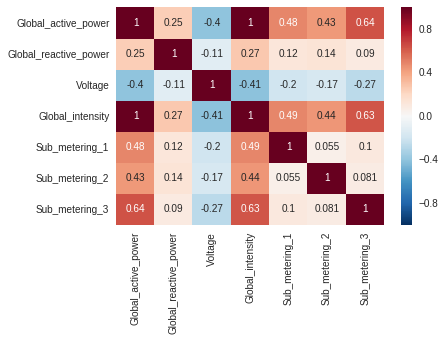

In [25]:
sns.heatmap(data.corr(),annot=True)

In [24]:
# Corr. b/w global intensity and global active power found

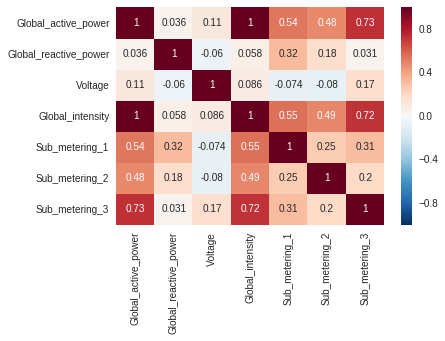

In [27]:
sns.heatmap(data.resample('D').mean().corr(),annot=True)

In [28]:
#Corr. changes but not that much

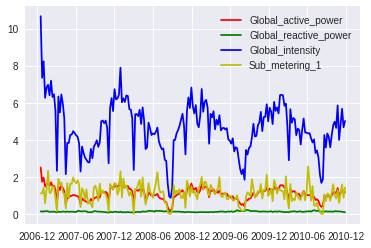

In [39]:
plt.plot(data['Global_active_power'].resample('W').mean(),color='r')
plt.plot(data['Global_reactive_power'].resample('W').mean(),color='g')
plt.plot(data['Global_intensity'].resample('W').mean(),color='b')
plt.plot(data['Sub_metering_1'].resample('W').mean(),color='y')

plt.legend()

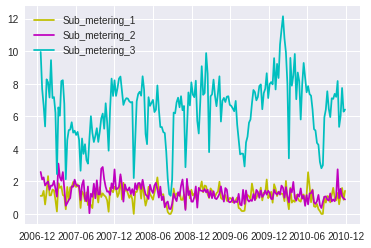

In [41]:
plt.plot(data['Sub_metering_1'].resample('W').mean(),color='y')
plt.plot(data['Sub_metering_2'].resample('W').mean(),color='m')
plt.plot(data['Sub_metering_3'].resample('W').mean(),color='c')
plt.legend()

In [45]:
data['Sub_metering_1'].corr(data['Sub_metering_2'])

0.054720864323478328

In [46]:
#No corr b/w s and 2 is found

# Machine Learing Data Preperation

In [93]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [95]:
data = data.resample('H').mean()

In [96]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [97]:
data.shape

(34589, 7)

### First Scaling the features

In [99]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scaled_data = mms.fit_transform(data)

### Train Test Split As LSTM takes in form of (no.of sample,timesteps,features)

In [114]:
# in LSTM custom train test split is valid only
# Taking traing data less to run things faster
train_data = scaled_data[:8648,:]
test_data = scaled_data[8648:,:]

In [115]:
train_data.shape

(8648, 7)

In [116]:
train_data = train_data.reshape(train_data.shape[0],1,train_data.shape[1])
test_data = test_data.reshape(test_data.shape[0],1,test_data.shape[1])

In [117]:
print(train_data.shape)
print(test_data.shape)

(8648, 1, 7)
(25941, 1, 7)


In [125]:
#Taking Y train next day values so as to fit in the model of Recurrent Neural  Network
x_train = train_data[:len(train_data)-1,:]
y_train = train_data[1:len(train_data),0,0]

In [126]:
x_train.shape

(8647, 1, 7)

In [127]:
y_train.shape

(8647,)

In [151]:
#Taking Y train next day values so as to fit in the model of Recurrent Neural  Network
x_test = test_data[:len(test_data)-1,:]
y_test = test_data[1:len(test_data),0,0]

In [153]:
x_test.shape

(25940, 1, 7)

In [154]:
y_test.shape

(25940,)

In [147]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [148]:
myreg = Sequential()

In [149]:
myreg.add(LSTM(units=100,activation='sigmoid',input_shape=(x_train.shape[1],x_train.shape[2]),return_sequences=True))
myreg.add(Dropout(0.2))
myreg.add(LSTM(units=100,activation='sigmoid'))
myreg.add(Dropout(0.2))
myreg.add(Dense(units=1))
myreg.compile(optimizer='adam',loss='mean_squared_error')

In [150]:
myreg.fit(x_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
8647/8647 [==============================] - 3s - loss: 0.0458     
Epoch 2/200
8647/8647 [==============================] - 3s - loss: 0.0219     
Epoch 3/200
8647/8647 [==============================] - 3s - loss: 0.0167     
Epoch 4/200
8647/8647 [==============================] - 3s - loss: 0.0160     
Epoch 5/200
8647/8647 [==============================] - 3s - loss: 0.0152     
Epoch 6/200
8647/8647 [==============================] - 3s - loss: 0.0146     
Epoch 7/200
8647/8647 [==============================] - 3s - loss: 0.0140     
Epoch 8/200
8647/8647 [==============================] - 3s - loss: 0.0136     
Epoch 9/200
8647/8647 [==============================] - 3s - loss: 0.0133     
Epoch 10/200
8647/8647 [==============================] - 3s - loss: 0.0129     
Epoch 11/200
8647/8647 [==============================] - 3s - loss: 0.0127     
Epoch 12/200
8647/8647 [==============================] - 3s - loss: 0.0125     
Epoch 13/200
8647/8647 [=============

8647/8647 [==============================] - 3s - loss: 0.0104     
Epoch 103/200
8647/8647 [==============================] - 3s - loss: 0.0103     
Epoch 104/200
8647/8647 [==============================] - 3s - loss: 0.0103     
Epoch 105/200
8647/8647 [==============================] - 3s - loss: 0.0104     
Epoch 106/200
8647/8647 [==============================] - 3s - loss: 0.0104     
Epoch 107/200
8647/8647 [==============================] - 3s - loss: 0.0104     
Epoch 108/200
8647/8647 [==============================] - 3s - loss: 0.0103     
Epoch 109/200
8647/8647 [==============================] - 3s - loss: 0.0103     
Epoch 110/200
8647/8647 [==============================] - 3s - loss: 0.0104     
Epoch 111/200
8647/8647 [==============================] - 3s - loss: 0.0103     
Epoch 112/200
8647/8647 [==============================] - 3s - loss: 0.0103     
Epoch 113/200
8647/8647 [==============================] - 3s - loss: 0.0104     
Epoch 114/200
8647/8647 [=====

In [142]:
x_train.shape

(8647, 1, 7)

In [155]:
yp = myreg.predict(x_test)

In [156]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,yp)

0.0084595100757131232

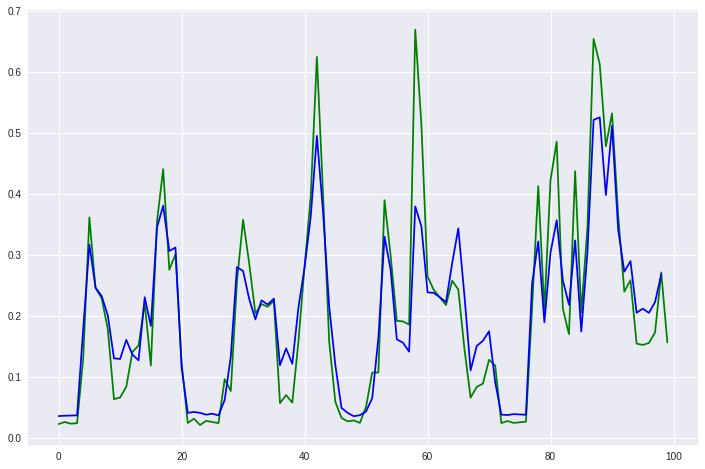

In [164]:
plt.figure(figsize=(12,8))
plt.plot(y_test[:100],color='g')
plt.plot(yp[1:100],color='b')
